# Práctica 4: Fractales
## Antonio Sevilla

In [1]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pylab
from PIL import Image

### Ejercicio 1

In [12]:
def koch_recursivo(inicial, final, n):
    """ 
    este método recursivo devuelve las coordenadas ordenadas de los puntos de la curva de Koch entre los puntos inicio y final de la iteración número n
    """
    # cuando se alcanza el primer nivel de profundidad se devuelven todos los puntos como un array de tuplas
    if n == 0:
        return np.vstack((inicial, final))
    else:
        p1 = (2*inicial + final)/3
        p2 = (inicial + final)/2 + np.array([(inicial-final)[1], (final-inicial)[0]])*math.sqrt(3)/6
        p3 = (inicial + 2*final)/3
        return 10*np.vstack(((koch_recursivo(inicial, p1, n-1),
                            koch_recursivo(p1, p2, n-1),
                            koch_recursivo(p2, p3, n-1),
                            koch_recursivo(p3, final, n-1))))


In [13]:
koch_recursivo(np.array([0,0]),np.array([1,0]), 2)

array([[  0.        ,   0.        ],
       [ 11.11111111,   0.        ],
       [ 11.11111111,   0.        ],
       [ 16.66666667,   9.62250449],
       [ 16.66666667,   9.62250449],
       [ 22.22222222,   0.        ],
       [ 22.22222222,   0.        ],
       [ 33.33333333,   0.        ],
       [ 33.33333333,   0.        ],
       [ 38.88888889,   9.62250449],
       [ 38.88888889,   9.62250449],
       [ 33.33333333,  19.24500897],
       [ 33.33333333,  19.24500897],
       [ 44.44444444,  19.24500897],
       [ 44.44444444,  19.24500897],
       [ 50.        ,  28.86751346],
       [ 50.        ,  28.86751346],
       [ 55.55555556,  19.24500897],
       [ 55.55555556,  19.24500897],
       [ 66.66666667,  19.24500897],
       [ 66.66666667,  19.24500897],
       [ 61.11111111,   9.62250449],
       [ 61.11111111,   9.62250449],
       [ 66.66666667,   0.        ],
       [ 66.66666667,   0.        ],
       [ 77.77777778,   0.        ],
       [ 77.77777778,   0.        ],
 

In [4]:
def koch_plot(paso):
    # fijamos la relación de aspecto
    pylab.axes().set_aspect(1)
    # pasamos como parámetro inicial el ingtervalo (0,1)
    result = koch_recursivo(np.array([0,0]),np.array([1,0]), paso)
    x, y = [], []
    for i in result:
        x.append(i[0]); y.append(i[1])
    # al tener los puntos ordenados podemos pintar los correspondientes segmentos que los unen
    plt.plot(x, y, "b")
    plt.title("Curva de Koch")
    plt.legend(["paso = " + str(paso)])
    plt.show()

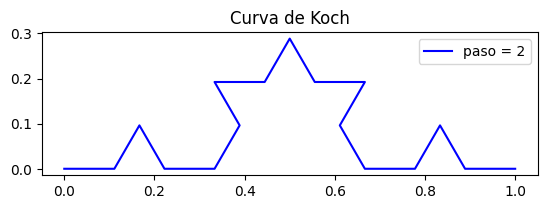

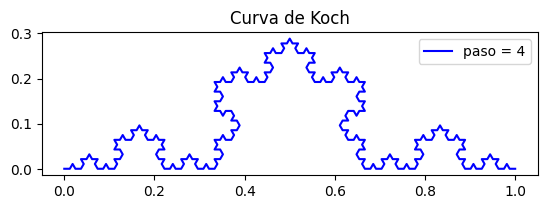

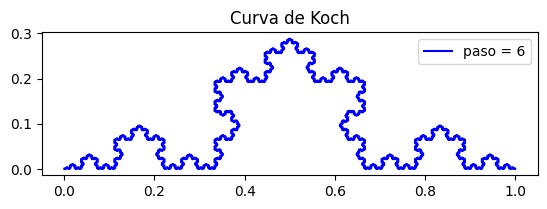

In [5]:
for i in range(2, 7, 2):
    koch_plot(i)

### Ejercicio 2


Si consideramos la curva de Koch que en el paso $0$ es el segmento de $(0,0)$ a $(0,1)$; se puede observar fácilmente que en el paso $1$ la curva de Koch cabe en un rectángulo de base $1$ y altura $\frac{1}{3}$ y que en general en el paso $k$ está contenida en $4^{k-1}$ rectángulos de base $\frac{1}{3^{k-1}}$ y altura $\frac{1}{3^{k}}$. 

El límite del perímetro de la curva cuando  $k$ tiende a $\infty$ es trivialmente $\infty$. Por otro lado, el límite en $k$ del área es 0, por lo que la dimensión fractal está entre 1 y 2.

Aplicando una homotecia con factor de escala 1/3 a la curva de Koch se obtiene ella misma, con lo que

$$medida(3K) = 3^d \times medida(K)$$

Tenemos además que 

$$medida(3K) = 4 \times medida(K)$$

Obteniendo así la fórmula de Hausdorff-Besicovitch

$\Rightarrow d = \frac{log(4)}{log(3)}$


### Ejercicio 3

#### 3a

In [6]:
def puntos_cuadricula(puntos, h, limx, limy):
    """
    este método recoge en una matriz binaria si hay un punto del vector puntos en cada cuadrado de una cuadrícula con h celdas y límites limx, limy.
    al eligir con un cuidado razonable h, los cuadros cuyos bordes intersecan la curva coinciden con los cuadros donde se ubica un vértice de la misma
    """
    # creamos una matriz de ceros
    matrix = []
    for x in range(h):
        matrix.append(np.zeros(h))
    # recorremos todos los cuadros
    for x in range(h):
        for y in range(h):
            for punto in puntos:
                # si encontramos un punto en la cuadrícula se añade un 1 a la matriz binaria
                if x*limx/h <= punto[0] and punto[0] < (x+1)*limx/h and y*limy/h <= punto[1] and punto[1] < (y+1)*limy/h:
                    matrix[h-1-x][h-1-y] = 1
                    break
    matrix = np.transpose(np.array(matrix))
    return matrix

In [7]:
def plot_matrix_koch(data, fig_size, paso, h):
    """   
    este método dibuja la mariz binaria de la aproximación de box-counting de finura h para una curva de Koch dada
    """
    fig, ax = plt.subplots(figsize=(fig_size, fig_size))
    ax.imshow(data, cmap=mpl.colormaps["cividis"]) 
    plt.ylim([len(data), len(data)*2/3])
    plt.axis("off")
    plt.title("Box-Counting sobre Curva de Koch\n paso = " + str(paso) + "   h = " + str(h))
    plt.show()

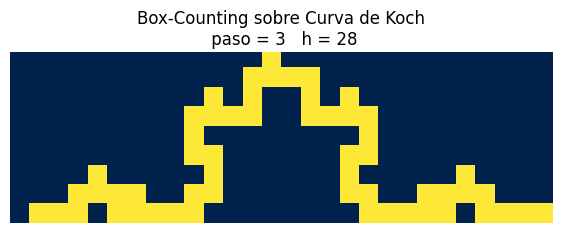

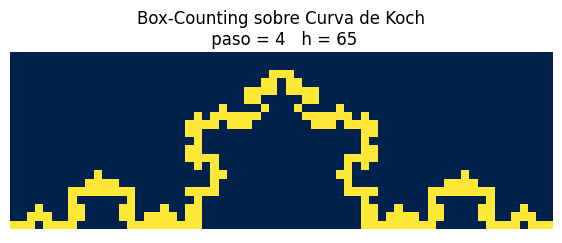

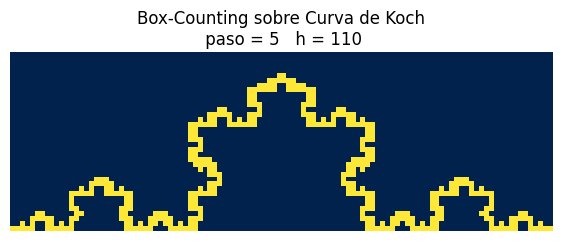

In [8]:
for tupla in ((3, 28), (4, 65), (5, 110)):
    curva = koch_recursivo(np.array([0,0]),np.array([1,0]),tupla[0])
    matriz = puntos_cuadricula(curva, tupla[1], 1, 1)
    plot_matrix_koch(matriz, 7, tupla[0], tupla[1])


#### 3b

Para calcular la dimensión de box-counting de un fractal, hemos de ubicarlo sobre una cuadrícula espaciada uniformemente y contar cuántos cuadros se requieren para cubrir el conjunto. La dimensión de box-counting es la proporción (logaritmo contra logaritmo) en la que cambia este número a medida que hacemos la cuadrícula más fina.

Se puede expresar como el límite cuando $l$ tiende a $0$ de $\frac{log(N(l))}{log(1/l)}$ siendo $l$ el lado de los cuadros y $N(l)$ la función "número de cuadros requeridos para cubrir el conjunto con cuadros de lado $l$".

#### 3c

In [9]:
def contar_puntos(puntos, h, limx, limy):
    """
    este método cuenta la cantidad de puntos del vector de tuplas puntos en cada cuadro de una cuadrícula con h celdas y límites limx, limy
    """
    res = 0
    # recorremos todos los cuadros
    for x in range(h):
        for y in range(h):
            for punto in puntos:
                # si encontramos un punto en la cuadrícula se suma 1 al resultado
                if x*limx/h <= punto[0] and punto[0] < (x+1)*limx/h and y*limy/h <= punto[1] and punto[1] < (y+1)*limy/h:
                    res += 1
                    break
    return res

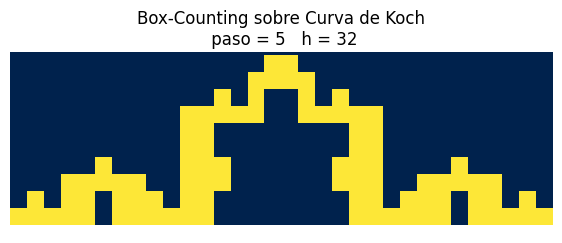

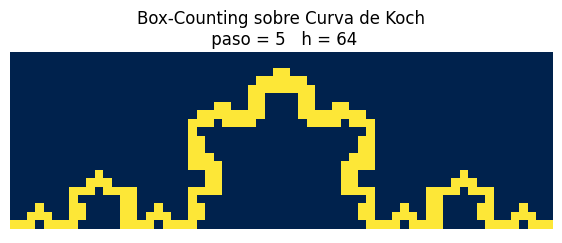

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Antonio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Antonio\AppData\Local\Temp\ipykernel_7636\2123328507.py", line 4, in <module>
    puntos.append((contar_puntos(curva, tupla[1], 1, 1), 1/tupla[1]))
  File "C:\Users\Antonio\AppData\Local\Temp\ipykernel_7636\1080958011.py", line -1, in contar_puntos
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Antonio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2057, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\Antonio\AppData\Local\Packages\Pyth

In [10]:
# conseguimos muestras de conteo de puntos para distintas finuras
puntos = []
for tupla in ((5, 2**5), (5, 2**6), (5, 2**7)):
    puntos.append((contar_puntos(curva, tupla[1], 1, 1), 1/tupla[1]))
    curva = koch_recursivo(np.array([0,0]),np.array([1,0]),tupla[0])
    matriz = puntos_cuadricula(curva, tupla[1], 1, 1)
    plot_matrix_koch(matriz, 7, tupla[0], tupla[1])

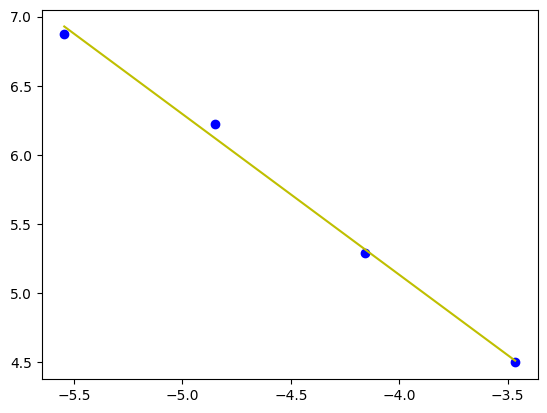

dimensiones de box-counting: [1.29837062 1.27155944 1.28246856 1.23948492]
dimensión de autosemejanza:  1.2618595071429148


In [ ]:
# hacemos la regresión logarítimca sorbe los puntos obtenidos
puntos = [(90, 0.03125), (198, 0.015625), (504, 0.0078125), (966, 0.00390625)]
l,N = [],[]
for i in puntos:
    l.append(i[1])
    N.append(i[0])
fit = np.polyfit(np.log(l),np.log(N), 1)
plt.plot(np.log(l),np.log(N), "bo")
plt.plot(np.log(l), fit[1] + fit[0]*np.log(l), "y-")
plt.show()
# la dimensión de box-counting parece aproximarse a la dimensión autosemejante
print("dimensiones de box-counting: " + str((np.log(np.array(N))/np.log(1/np.array(l)))))
print("dimensión de autosemejanza:  " + str(math.log(4)/math.log(3)))

### Ejercicio 4

#### 4.1

In [ ]:
def sierpinski(P):
    """
    este método devuelve como tupla el valor de los 3 puntos generados en cada paso sobre un triángulo dado el mismo como terna
    """
    a, b, c = P/2, P/2 + np.array([1/2, 0]), P/2 + np.array([1/4, math.sqrt(3)/4])
    return (a, b, c)

In [ ]:
def sierpinski_iterativo(pasos):
    """  
    este método devuelve los puntos del fractal de Sierpinski en cierto paso como un array de tuplas
    """
    result = []
    # generamos el triángulo inicial
    triang = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])
    # a cada triángulo le aplicamos pasos veces el método sierpinski
    for paso in range(pasos):
        triang = np.array(sierpinski(triang))
    for triangulo in triang.reshape(3**pasos, 3, 2):
        for punto in triangulo:
            if list(punto) not in result:
                # guardamos en una lista cada vértice de los triángulos
                result.append(list(punto))
    return result

In [ ]:
sierpinski_iterativo(2)

[[0.0, 0.0],
 [0.25, 0.0],
 [0.125, 0.21650635094610965],
 [0.5, 0.0],
 [0.375, 0.21650635094610965],
 [0.25, 0.4330127018922193],
 [0.75, 0.0],
 [0.625, 0.21650635094610965],
 [1.0, 0.0],
 [0.875, 0.21650635094610965],
 [0.75, 0.4330127018922193],
 [0.5, 0.4330127018922193],
 [0.375, 0.649519052838329],
 [0.625, 0.649519052838329],
 [0.5, 0.8660254037844386]]

In [ ]:
def sierpinski_plot(pasos):
    """  
    este método representa el fractal de Sierpinski en cierto paso
    """
    # construimos el triangulo inicial
    triang = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])
    # generamos iterativamente todos los triángulos hasta el paso pedido
    for paso in range(pasos):
        triang = np.array(sierpinski(triang))
    #  representamos la figura obtenida
    subplot = plt.figure().add_subplot()
    # representamos cada triángulo en la ubicación adecuada mediante el método reshape
    for triangulo in triang.reshape(3**pasos, 3, 2):
        # rellenamos los polígonos
        subplot.add_patch(mpatches.Polygon(triangulo, fc = "m"))
    plt.title("Triángulo de Sierpinski")
    plt.legend(["paso " + str(pasos)])
    plt.show()

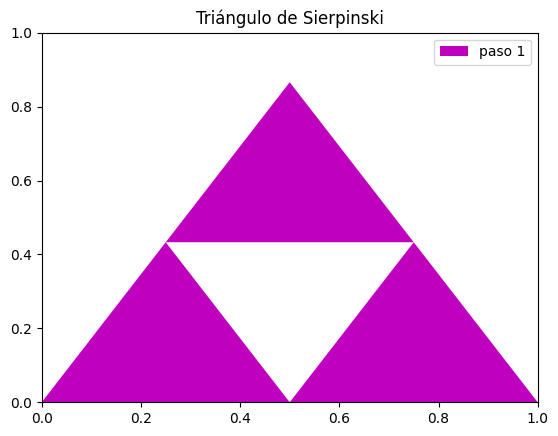

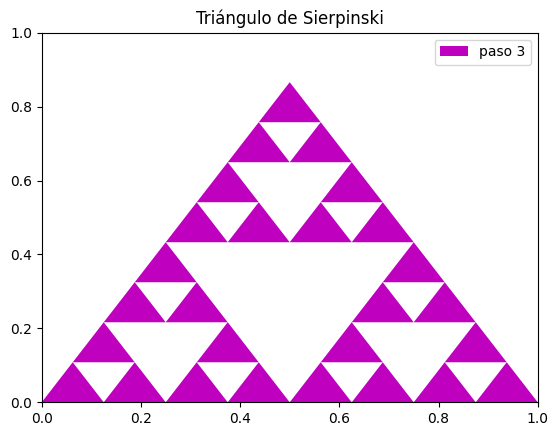

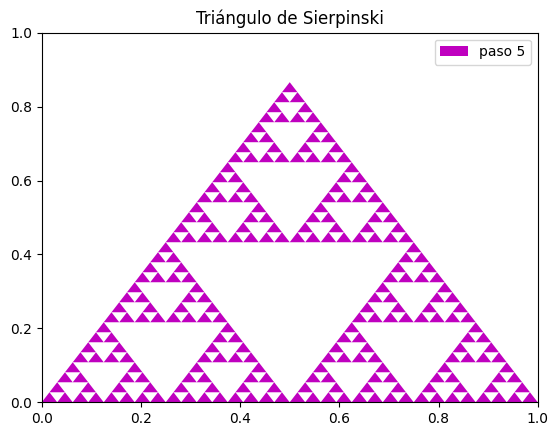

In [ ]:
for i in range(1, 6, 2):
    sierpinski_plot(i)

#### 4.2

Procedemos similarmente a como lo hicimos en el ejercicio 2.

Si consideramos el triángulo que en el caso $0$ tiene por vértices $(0, 0)$, $(1, 0)$, $(\frac{1}{2}, \frac{\sqrt3}{2})$; se puede observar fácilmente que en el paso $1$ está conformado por $3$ triángulos equiláteros de lado $\frac{1}{2}$ y que en general el fractal de Sierpinski en el paso $k$ está conformado por  $3^{k}$ triángulos de lado $\frac{1}{2^{k}}$.

Nuevamente, el límite del perímetro cuando la curva $k$ tiende a $\infty$ es trivialmente $\infty$. Por otro lado, el límite en $k$ del área es 0, por lo que la dimensión fractal está entre 1 y 2.

Aplicando una homotecia con factor de escala 1/2 al triángulo de Sierpinski se obtiene él mismo, con lo que

$$medida(2K) = 2^d \times medida(K)$$

Tenemos además que 

$$medida(2K) = 3 \times medidas(K)$$

Obteniendo de nuevo la fórmula de Hausdorff-Besicovitch

$\Rightarrow d = \frac{log(3)}{log(2)}$

#### 4.3

##### 4.3a

In [ ]:
def plot_matrix_sierpinski(data, fig_size, paso, h):
    """   
    este método dibuja la mariz binaria de la aproximación de box-counting de finura h para un triángulo de sierpinski en cierto paso
    """
    fig, ax = plt.subplots(figsize=(fig_size, fig_size))
    ax.imshow(data, cmap=mpl.colormaps["viridis"])
    plt.ylim([len(data), len(data)*1/9])
    plt.axis("off")
    plt.title("Box-Counting sobre Triángulo de Sierpinski\n paso = " + str(paso) + "   h = " + str(h))
    plt.show()

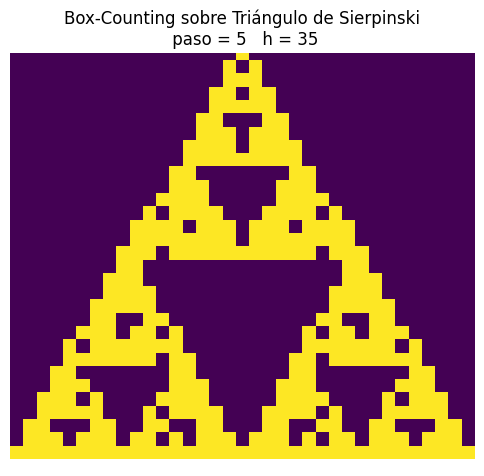

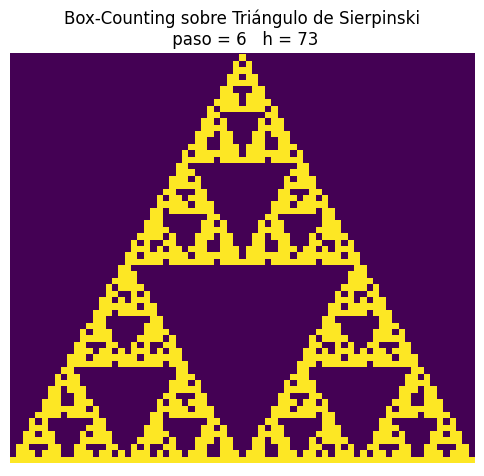

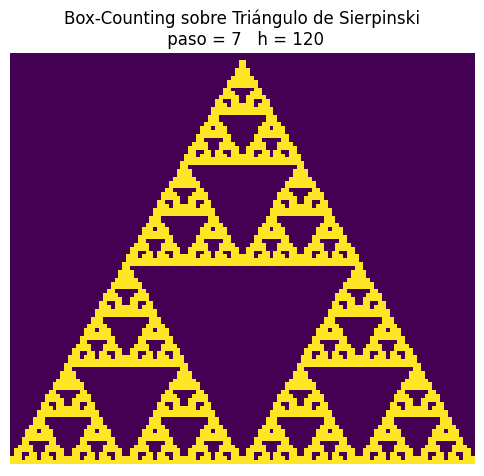

In [ ]:
for tupla in ((5, 35), (6, 73), (7, 120)):
    curva = sierpinski_iterativo(tupla[0])
    matriz = puntos_cuadricula(curva, tupla[1], 1, 1)
    plot_matrix_sierpinski(matriz, 6, tupla[0], tupla[1])

##### 4.3c

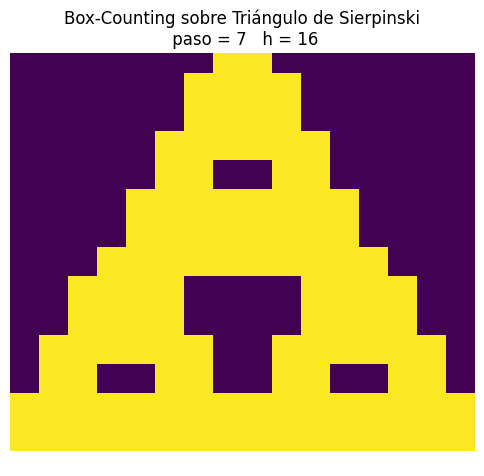

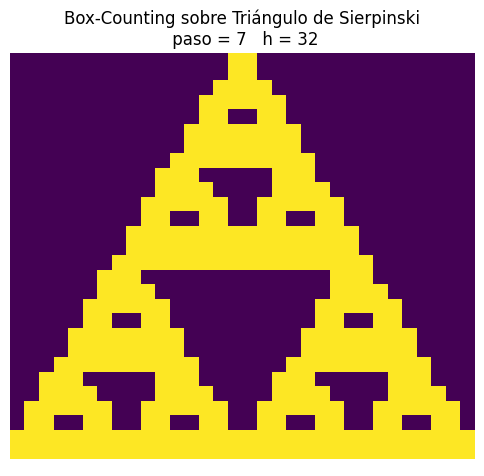

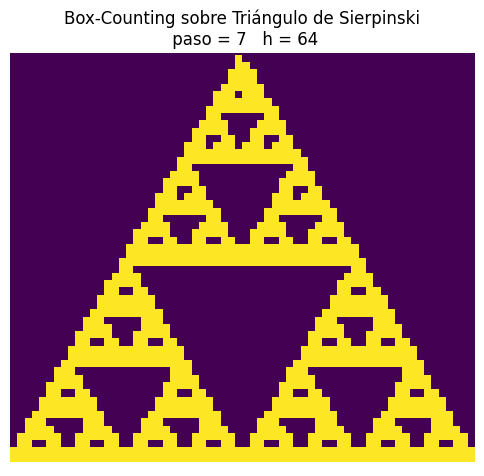

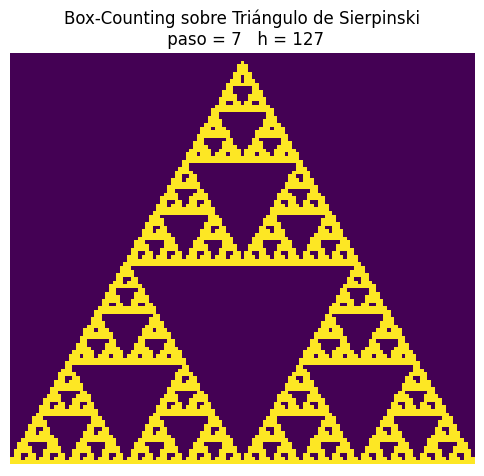

In [ ]:
# conseguimos muestras de conteo de puntos para distintas finuras
puntos_sierpinski = []
for tupla in ((7, 2**4), (7, 2**5), (7, 2**6), (7, 2**7 - 1)):
    puntos_sierpinski.append((contar_puntos(curva, tupla[1], 1, 1), 1/tupla[1]))
    curva = sierpinski_iterativo(tupla[0])
    matriz = puntos_cuadricula(curva, tupla[1], 1, 1)
    plot_matrix_sierpinski(matriz, 6, tupla[0], tupla[1])

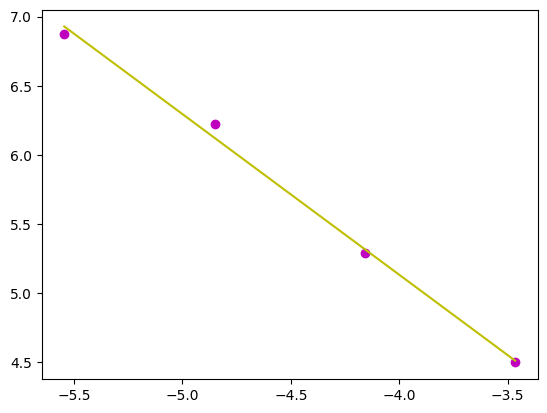

dimensiones de box-counting: [1.29837062 1.27155944 1.28246856 1.23948492]
dimensión de autosemejanza:  1.5849625007211563


In [ ]:
# hacemos la regresión logarítimca
puntos_sierpinski = [(90, 0.03125), (198, 0.015625), (504, 0.0078125), (966, 0.00390625)]
l,N = [],[]
for i in puntos_sierpinski:
    l.append(i[1])
    N.append(i[0])
fit = np.polyfit(np.log(l),np.log(N), 1)
plt.plot(np.log(l),np.log(N), "mo")
plt.plot(np.log(l), fit[1] + fit[0]*np.log(l), "y-")
plt.show()
# la dimensión de box-counting parece aproximarse a la dimensión autosemejante
print("dimensiones de box-counting: " + str((np.log(np.array(N))/np.log(1/np.array(l)))))
print("dimensión de autosemejanza:  " + str(math.log(3)/math.log(2)))

### Ejercicio 5

In [ ]:
nombre_imagen = "GB-pic.png"

In [ ]:
def matriz_binaria():
    """ 
    a partir de la imagen de Gran Bretaña se obtiene una matriz binaria que determina si cada píxel es transparente o no
    """
    GB = Image.open(nombre_imagen,'r') 
    ylim, xlim = GB.size
    GB = np.asarray(GB)
    matriz = []
    for x in range(0, xlim):
        matriz.append([])
        for y in range(0, ylim):
            if GB[x][y][3] != 0:
                matriz[x].append(0)
            else:
                matriz[x].append(1)
    return matriz

In [ ]:
def cuadriculas_size_k(k):
    """ 
    este método devuelve a partir de la imagen, qué cuadros de la cuadrícula pertenecen al borde al contener píxeles de distinta transparencia
    esta vez k es el tamaño de la cuadrícula
    """
    matriz = matriz_binaria()
    cuadriculas = []
    # recorremos toda la matriz en cuadrículas
    for x in range(0,len(matriz)-k,k):
        cuadriculas.append([])
        for y in range(0,len(matriz[0])-k,k):
            cuadricula = []
            for i in range(x, x + k):
                for j in range(y, y + k):
                    cuadricula.append(matriz[i][j])
            # buscamos píxeles de distinta transparencia
            hay_uno, hay_cero = False, False
            for elemento in cuadricula:
                if elemento == 1:
                    hay_uno = True
                elif elemento == 0:
                    hay_cero = True
                # al encontrarlos paramos de buscar
                if hay_uno and hay_cero:
                    cuadriculas[x//k].append(1)
                    break
            if not (hay_uno and hay_cero):
                cuadriculas[x//k].append(0)
    return cuadriculas

In [ ]:
def plot_cuadricula_from_matrix(data, fig_size, k):
    """       
    este método representa la aproximación de box-counting de finura k para la imagen de la costa de Gran Bretaña
    """
    fig, ax = plt.subplots(figsize=(fig_size,fig_size))
    plt.title("Box-Counting sobre la costa de Gran Bretaña\n" + "   k = " + str(k))
    ax.imshow(data, cmap=mpl.colormaps["magma"])
    ax.axis("off")
    plt.show()

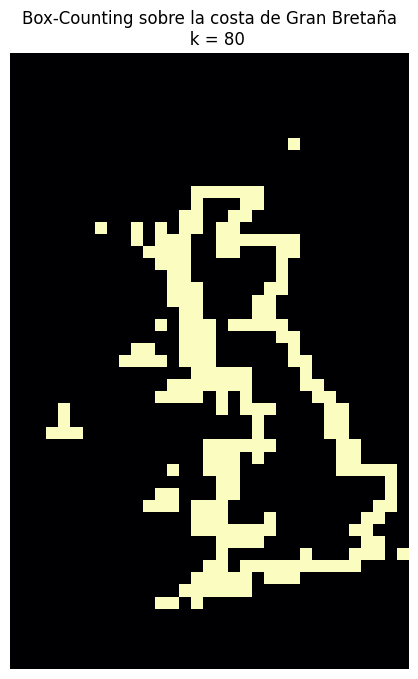

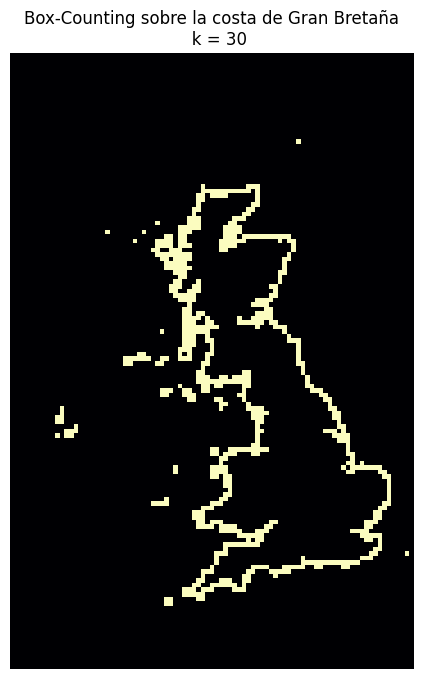

In [ ]:
for i in (80, 30):
    plot_cuadricula_from_matrix(cuadriculas_size_k(i), 8, i)

In [ ]:
def contar_bordes(k):
    """ 
    este método devuelve a partir de la imagen, el número de cuadros de la cuadrícula pertenecen al borde al contener píxeles de distinta transparencia
    esta vez k es el tamaño de la cuadrícula
    """
    matriz = matriz_binaria()
    res = 0
    for x in range(0,len(matriz)-k,k):
        for y in range(0,len(matriz[0])-k,k):
            cuadricula = []
            for i in range(x, x + k):
                for j in range(y, y + k):
                    cuadricula.append(matriz[i][j])
            # buscamos píxeles de distinta transparencia
            hay_uno, hay_cero = False, False
            for elemento in cuadricula:
                if elemento == 1:
                    hay_uno = True
                elif elemento == 0:
                    hay_cero = True
                # al encontrarlos paramos de buscar
                if hay_uno and hay_cero:
                    res += 1
                    break
    return res

In [ ]:
# de nuevo, obtenemos muestras para distintos k

# GB = Image.open(nombre_imagen,'r') 
# ylim, xlim = GB.size
# cociente = math.sqrt(ylim**2  + xlim**2)
# puntos_gb = []
# for k in (256, 128, 64, 32, 16):
#     puntos_gb.append((contar_bordes(k), k/cociente))
# print(puntos_gb)

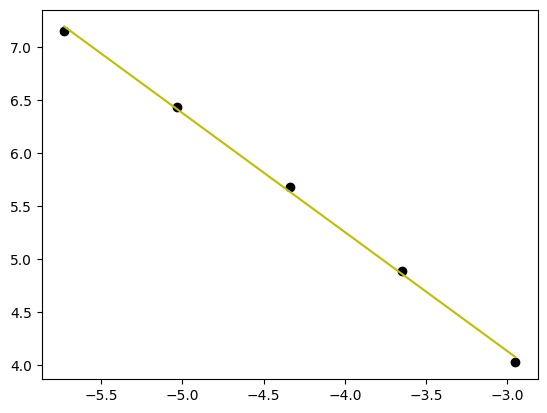

dimensiones de box-counting: [1.36323761 1.34131543 1.30985754 1.2777079  1.24881159]


In [ ]:
puntos_obtenidos = [(56, 0.052193985286915545), (133, 0.026096992643457773), (294, 0.013048496321728886),
                    (620, 0.006524248160864443), (1274, 0.0032621240804322216)]
# hacemos la regresión logarítimca
k,N = [],[]
for i in puntos_obtenidos:
    k.append(i[1])
    N.append(i[0])
fit = np.polyfit(np.log(k),np.log(N), 1)
plt.plot(np.log(k),np.log(N), "ko")
plt.plot(np.log(k), fit[1] + fit[0]*np.log(k), "y-")
plt.show()
# la dimensión de box-counting calculada disminuye conforme se aumenta la finura de la cuadrícula
# el valor verdadero es el del límite, con lo que la dimensión de box-counting de la costa de Ingalterra será de entorno a 1.25
print("dimensiones de box-counting: " + str((np.log(np.array(N))/np.log(1/np.array(k)))))